# **Loan Approval Prediction Using Machine Learning Techniques**

The aim of this project is to develop and implement efficient machine learning models for predicting loan approval based on historical applicant data, identifying patterns associated with approved and rejected loans. Our focus will be on evaluating and comparing the performance of these models during both the training and testing phases, using metrics such as accuracy, precision, recall, and F1-score. By analyzing these performance indicators, we aim to determine the most effective model for accurately predicting loan approvals in real-world scenarios.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('Loan-Approval-Prediction.csv')

In [3]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

# **Preprocessing the data.**

In [5]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
cat_imputer=SimpleImputer(strategy='most_frequent')
num_imputer=SimpleImputer(strategy='mean')

In [8]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [9]:
dataset[categorical_cols]=cat_imputer.fit_transform(dataset[categorical_cols])
dataset[numerical_cols]=num_imputer.fit_transform(dataset[numerical_cols])

In [10]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

Text(0.5, 0.98, 'Loan Status Distribution')

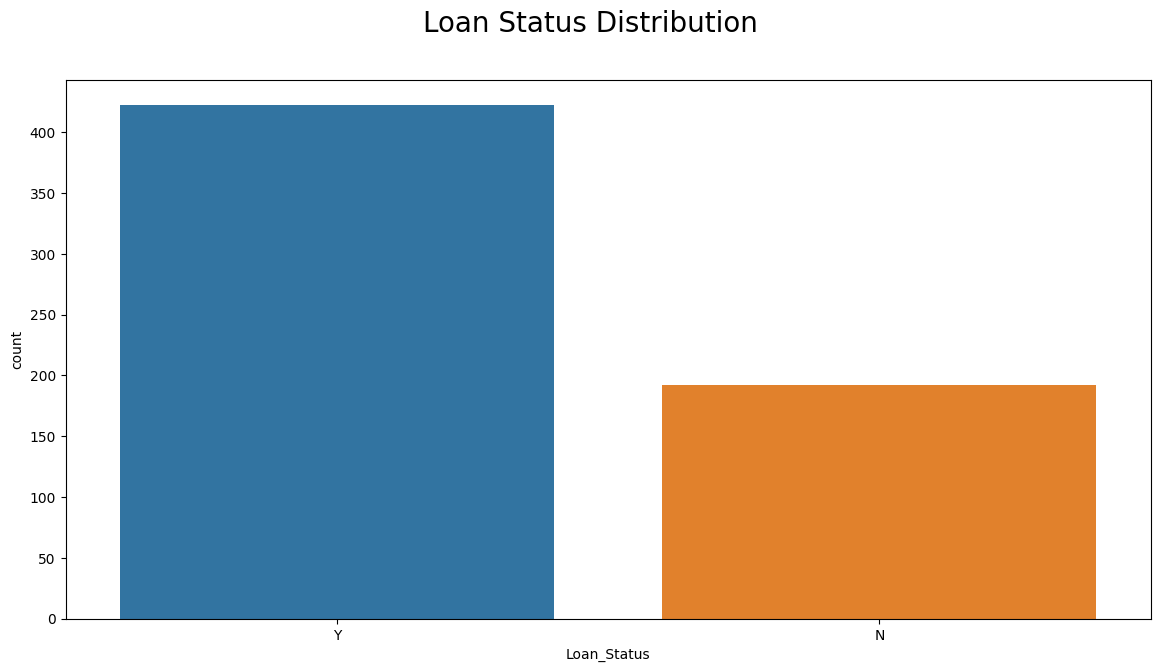

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(x='Loan_Status', data=dataset)
plt.suptitle('Loan Status Distribution',fontsize=20)

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

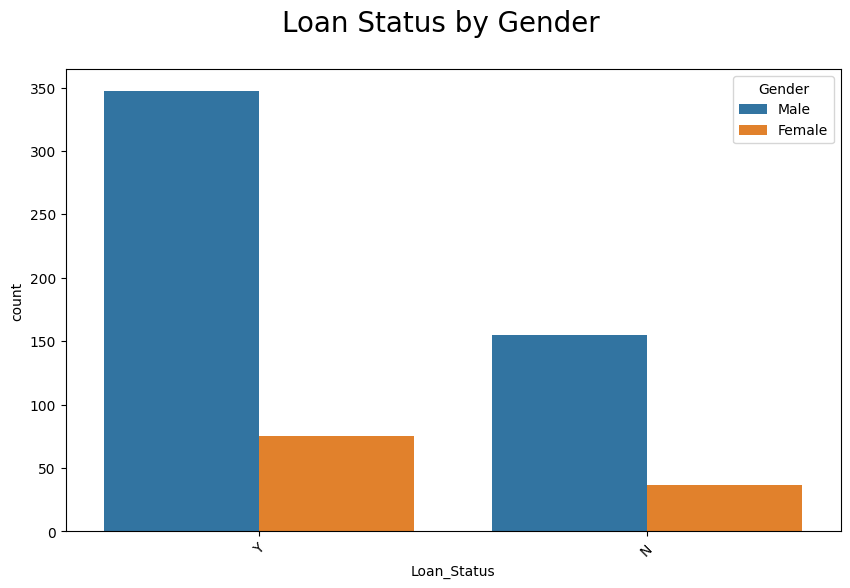

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Loan_Status', hue='Gender')
plt.suptitle("Loan Status by Gender",fontsize=20)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

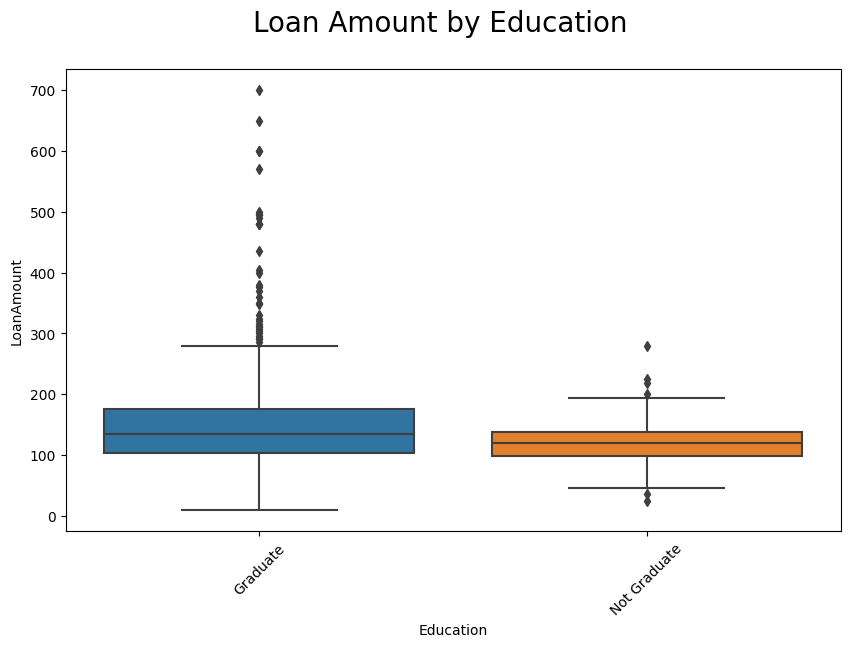

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Education', y='LoanAmount')
plt.suptitle("Loan Amount by Education",fontsize=20)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Urban'), Text(1, 0, 'Rural'), Text(2, 0, 'Semiurban')])

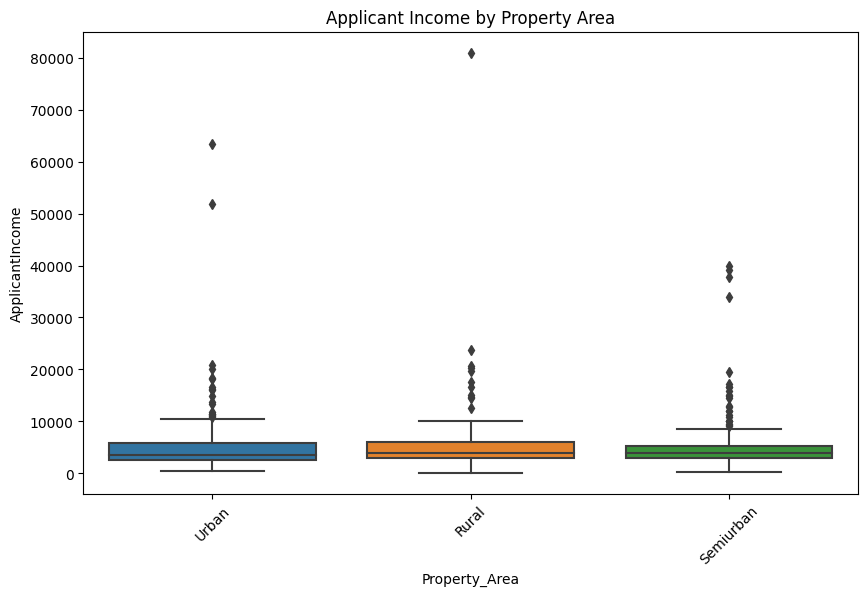

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Property_Area', y='ApplicantIncome')
plt.title("Applicant Income by Property Area")
plt.xticks(rotation=45)

Text(0.5, 0.98, 'Loan Amount by Loan Status')

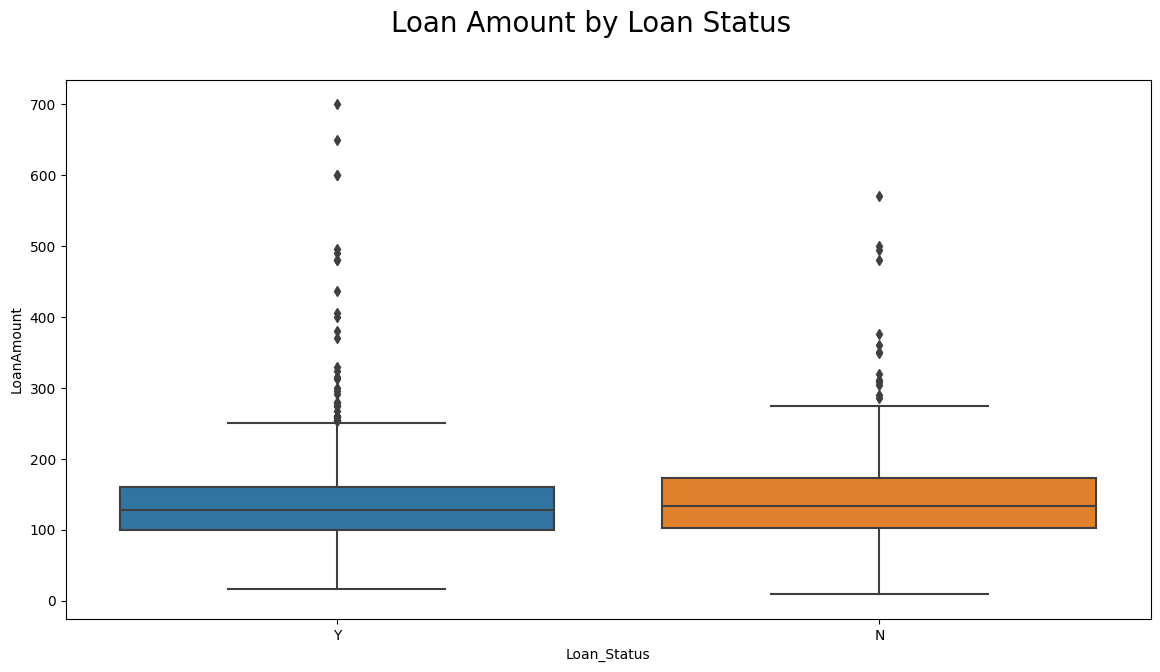

In [15]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=dataset)
plt.suptitle('Loan Amount by Loan Status',fontsize=20)

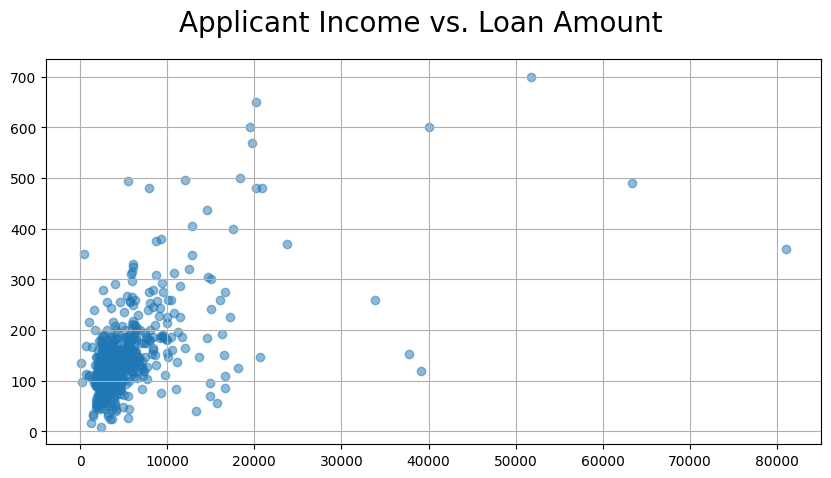

In [16]:
# Scatter plot for Applicant Income vs. Loan Amount
plt.figure(figsize=(10, 5))
plt.scatter(dataset['ApplicantIncome'], dataset['LoanAmount'], alpha=0.5)
plt.suptitle('Applicant Income vs. Loan Amount',fontsize=20)
plt.grid()

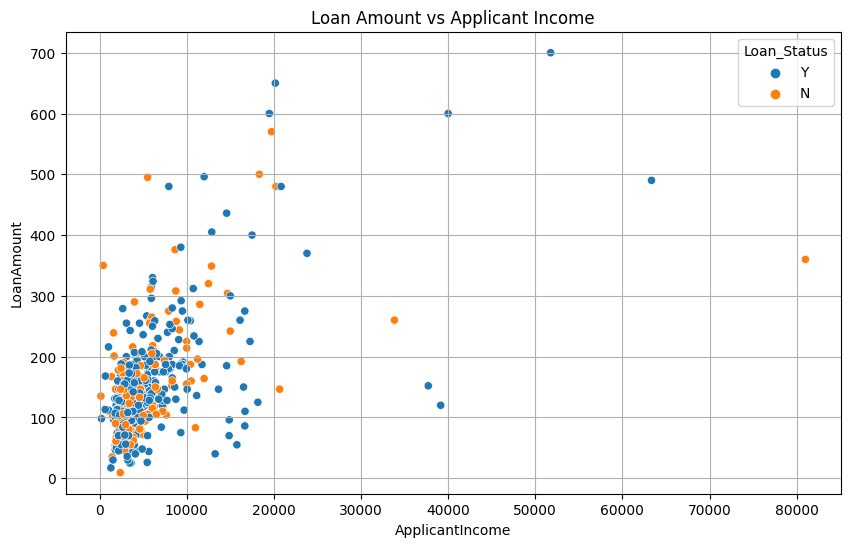

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title("Loan Amount vs Applicant Income")
plt.grid()

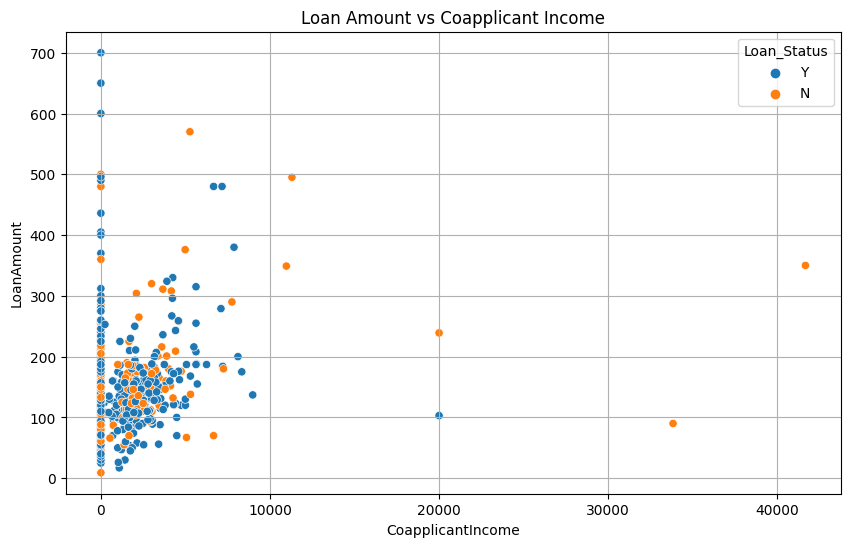

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title("Loan Amount vs Coapplicant Income")
plt.grid()

(array([0, 1, 2]),
 [Text(0, 0, '0.0'), Text(1, 0, '0.8421985815602837'), Text(2, 0, '1.0')])

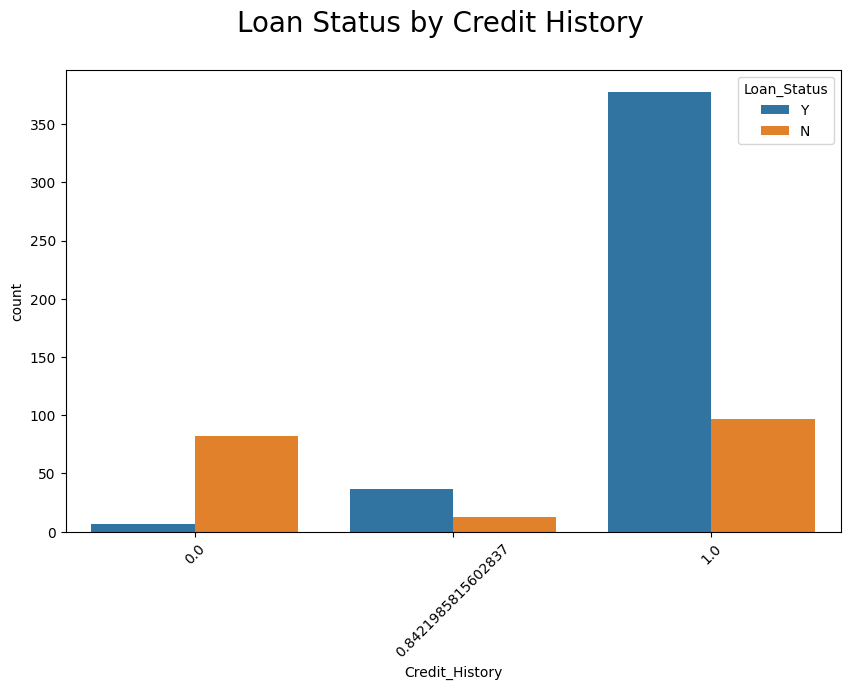

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Credit_History', hue='Loan_Status')
plt.suptitle("Loan Status by Credit History",fontsize=20)
plt.xticks(rotation=45)

# OUTLIERS

Text(0.5, 0.98, 'Box Plot of Applicant Income')

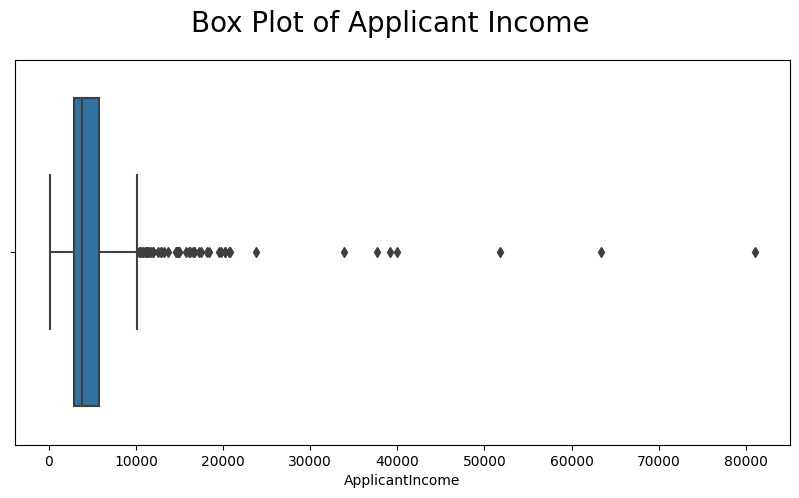

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['ApplicantIncome'])
plt.suptitle('Box Plot of Applicant Income',fontsize=20)

Text(0.5, 0.98, 'Box Plot of Coapplicant Income')

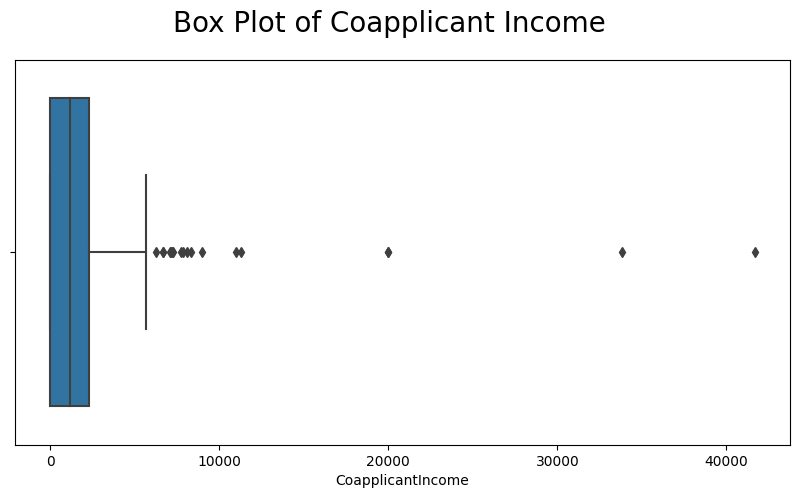

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['CoapplicantIncome'])
plt.suptitle('Box Plot of Coapplicant Income',fontsize=20)

Text(0.5, 0.98, 'Box Plot of Loan Amount')

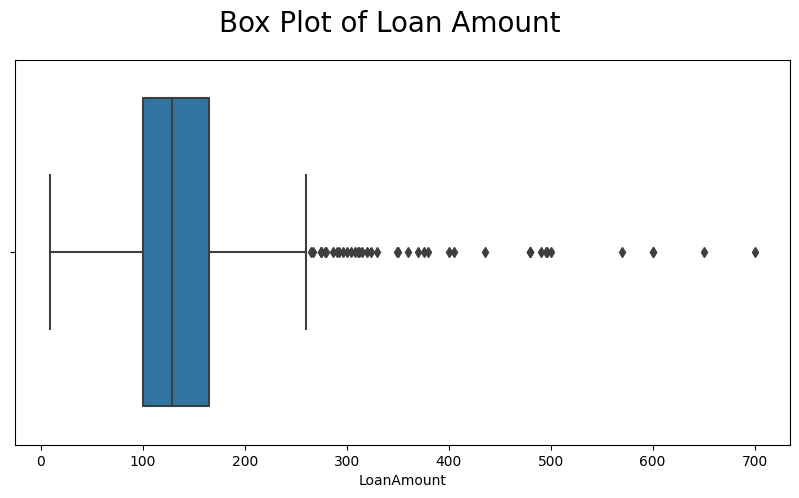

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['LoanAmount'])
plt.suptitle('Box Plot of Loan Amount',fontsize=20)

Text(0.5, 0.98, 'Box Plot of Loan Amount Term')

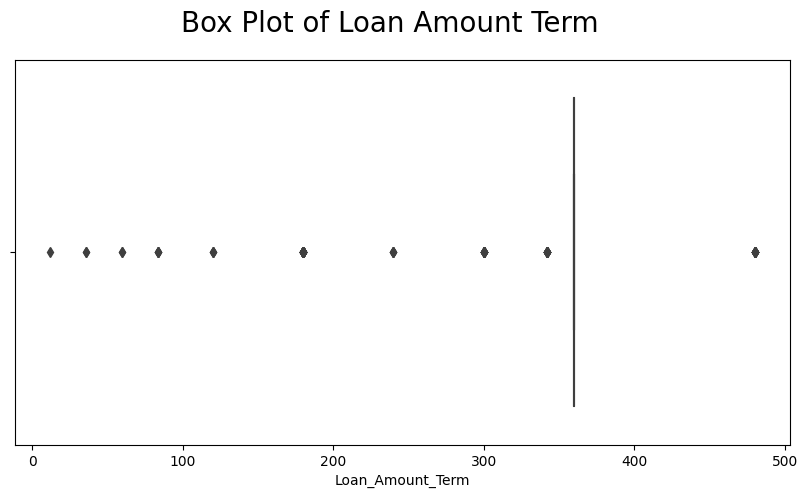

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=dataset['Loan_Amount_Term'])
plt.suptitle('Box Plot of Loan Amount Term',fontsize=20)

In [24]:
#importing the necassery libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [25]:
#creating an object for the preprocessing
label=LabelEncoder()
std=StandardScaler()

In [26]:
dataset['Loan_ID']=label.fit_transform(dataset['Loan_ID'])
dataset['Gender']=label.fit_transform(dataset['Gender'])
dataset['Married']=label.fit_transform(dataset['Married'])
dataset['Dependents']=label.fit_transform(dataset['Dependents'])
dataset['Education']=label.fit_transform(dataset['Education'])
dataset['Self_Employed']=label.fit_transform(dataset['Self_Employed'])
dataset['Property_Area']=label.fit_transform(dataset['Property_Area'])
dataset['Loan_Status']=label.fit_transform(dataset['Loan_Status'])

In [27]:
dataset['ApplicantIncome']=std.fit_transform(dataset['ApplicantIncome'].values.reshape(-1,1))
dataset['CoapplicantIncome']=std.fit_transform(dataset['CoapplicantIncome'].values.reshape(-1,1))
dataset['LoanAmount']=std.fit_transform(dataset['LoanAmount'].values.reshape(-1,1))
dataset['Loan_Amount_Term']=std.fit_transform(dataset['Loan_Amount_Term'].values.reshape(-1,1))

In [28]:
#Splitting the dataset to X and Y.
x=dataset[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
y=dataset[['Loan_Status']]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

# **Importing the machine learning models and fitting the dataset into the model**

Since, the target variable is a continous variable we are using the regression model to predict the outcome of the training and the testing dataset we have splitted above.

In [31]:
#Let's import the first model
from sklearn.linear_model import LogisticRegression

In [32]:
model_1=LogisticRegression()

In [33]:
model_1.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
model_1.score(x_train,y_train)

0.8097826086956522

In [35]:
y_pred_1=model_1.predict(x_test)

In [36]:
#Let us import the metrics to predict the model outcome.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error

In [37]:
print('F1 score: ', f1_score(y_test, y_pred_1))
print('Recall_score: ', recall_score(y_test, y_pred_1))
print('Precision score: ', precision_score(y_test, y_pred_1))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_1))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_1))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_1))

F1 score:  0.8802083333333333
Recall_score:  0.9825581395348837
Precision score:  0.7971698113207547
Accuracy Score:  0.8130081300813008
Mean Squared Error:  0.18699186991869918
Mean Absolute Error:  0.18699186991869918


Text(0.5, 0.98, 'Logistic Regression metrics value using confusion matrix')

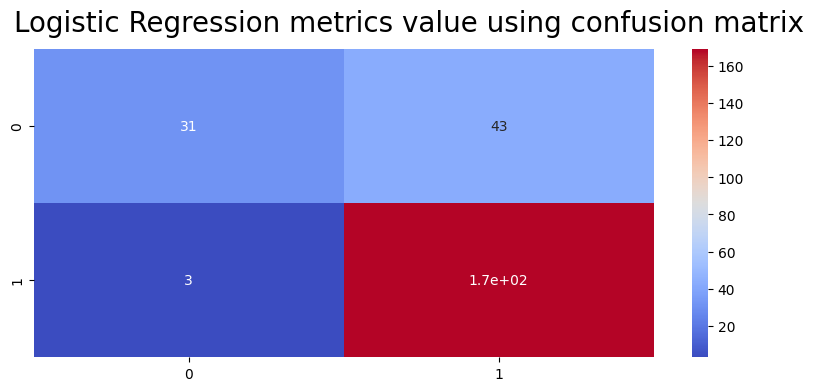

In [38]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_1), annot = True, cmap = 'coolwarm')
plt.suptitle('Logistic Regression metrics value using confusion matrix',fontsize=20)

In [39]:
#Let's import the second model
from sklearn.tree import DecisionTreeClassifier

In [40]:
model_2=DecisionTreeClassifier()

In [41]:
model_2.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
model_2.score(x_train,y_train)

1.0

In [43]:
y_pred_2=model_2.predict(x_test)

In [44]:
print('F1 score: ', f1_score(y_test, y_pred_2))
print('Recall_score: ', recall_score(y_test, y_pred_2))
print('Precision score: ', precision_score(y_test, y_pred_2))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_2))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_2))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_2))

F1 score:  0.7692307692307692
Recall_score:  0.7558139534883721
Precision score:  0.7831325301204819
Accuracy Score:  0.6829268292682927
Mean Squared Error:  0.3170731707317073
Mean Absolute Error:  0.3170731707317073


Text(0.5, 0.98, 'Decision Tree metrics value using confusion matrix')

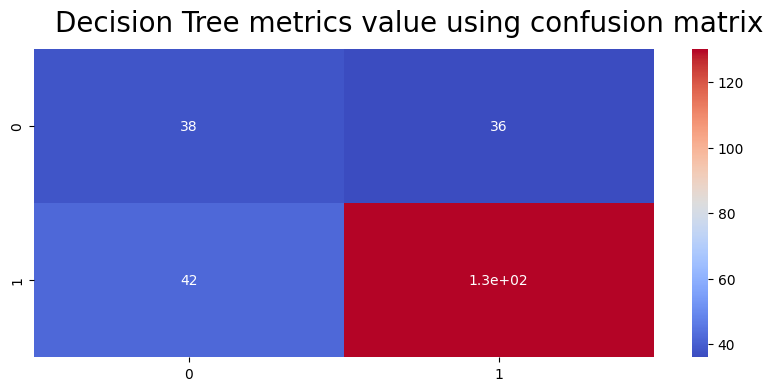

In [45]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_2), annot = True, cmap = 'coolwarm')
plt.suptitle('Decision Tree metrics value using confusion matrix',fontsize=20)

In [46]:
#Let's us import  the third model.
from sklearn.ensemble import RandomForestClassifier

In [47]:
model_3=RandomForestClassifier()

In [48]:
model_3.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_972\3858944095.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(x_train,y_train)


RandomForestClassifier()

In [49]:
model_3.score(x_train,y_train)

1.0

In [50]:
y_pred_3=model_3.predict(x_test)

In [51]:
print('F1 score: ', f1_score(y_test, y_pred_3))
print('Recall_score: ', recall_score(y_test, y_pred_3))
print('Precision score: ', precision_score(y_test, y_pred_3))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_3))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_3))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_3))

F1 score:  0.8594594594594593
Recall_score:  0.9244186046511628
Precision score:  0.803030303030303
Accuracy Score:  0.7886178861788617
Mean Squared Error:  0.21138211382113822
Mean Absolute Error:  0.21138211382113822


Text(0.5, 0.98, 'Random Forest metrics value using confusion matrix')

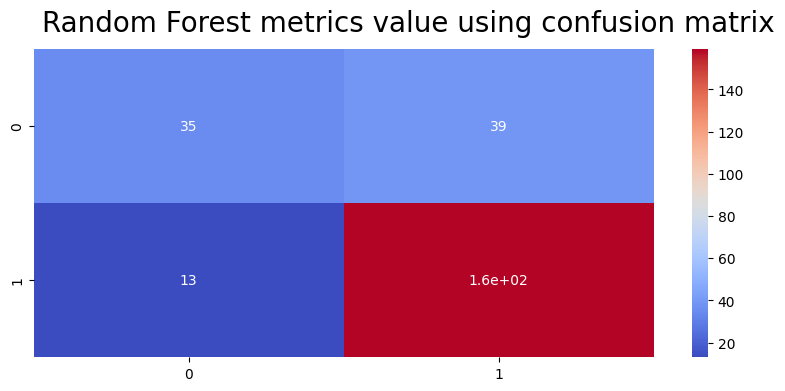

In [52]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_3), annot = True, cmap = 'coolwarm')
plt.suptitle('Random Forest metrics value using confusion matrix',fontsize=20)

In [53]:
#Let's us import the other model
from sklearn.neighbors import KNeighborsClassifier

In [54]:
model_4=KNeighborsClassifier()

In [55]:
model_4.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [56]:
model_4.score(x_train,y_train)

0.7282608695652174

In [57]:
y_pred_4=model_4.predict(x_test)

In [58]:
print('F1 score: ', f1_score(y_test, y_pred_4))
print('Recall_score: ', recall_score(y_test, y_pred_4))
print('Precision score: ', precision_score(y_test, y_pred_4))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_4))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_4))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_4))

F1 score:  0.753315649867374
Recall_score:  0.8255813953488372
Precision score:  0.6926829268292682
Accuracy Score:  0.6219512195121951
Mean Squared Error:  0.3780487804878049
Mean Absolute Error:  0.3780487804878049


Text(0.5, 0.98, 'KNN metrics value using confusion matrix')

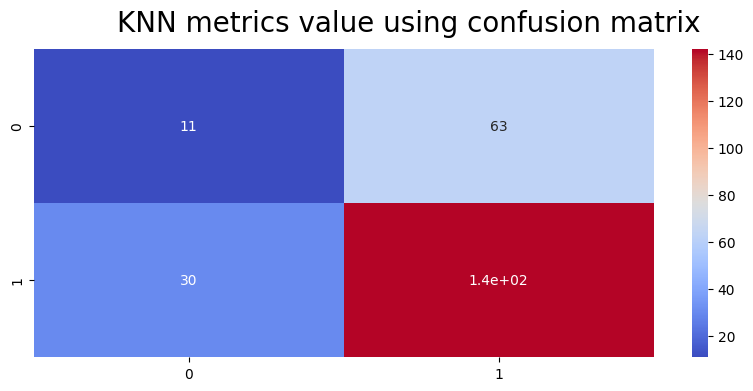

In [59]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_4), annot = True, cmap = 'coolwarm')
plt.suptitle('KNN metrics value using confusion matrix',fontsize=20)

In [60]:
from sklearn.svm import SVC

In [61]:
model_5=SVC()

In [62]:
model_5.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [63]:
model_5.score(x_train,y_train)

0.6793478260869565

In [64]:
y_pred_5=model_5.predict(x_test)

In [65]:
print('F1 score: ', f1_score(y_test, y_pred_5))
print('Recall_score: ', recall_score(y_test, y_pred_5))
print('Precision score: ', precision_score(y_test, y_pred_5))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_5))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_5))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_5))

F1 score:  0.8229665071770336
Recall_score:  1.0
Precision score:  0.6991869918699187
Accuracy Score:  0.6991869918699187
Mean Squared Error:  0.3008130081300813
Mean Absolute Error:  0.3008130081300813


Text(0.5, 0.98, 'SVM metrics value using confusion matrix')

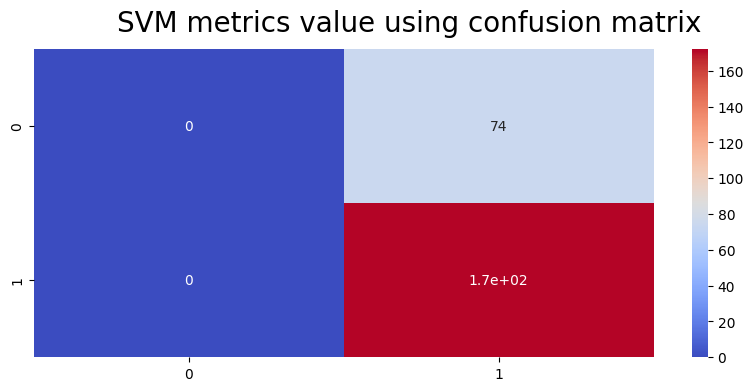

In [66]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_5), annot = True, cmap = 'coolwarm')
plt.suptitle('SVM metrics value using confusion matrix',fontsize=20)

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
model_6=GaussianNB()

In [69]:
model_6.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [70]:
model_6.score(x_train,y_train)

0.8016304347826086

In [71]:
y_pred_6=model_6.predict(x_test)

In [72]:
print('F1 score: ', f1_score(y_test, y_pred_6))
print('Recall_score: ', recall_score(y_test, y_pred_6))
print('Precision score: ', precision_score(y_test, y_pred_6))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_6))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_6))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_6))

F1 score:  0.8670212765957447
Recall_score:  0.9476744186046512
Precision score:  0.7990196078431373
Accuracy Score:  0.7967479674796748
Mean Squared Error:  0.2032520325203252
Mean Absolute Error:  0.2032520325203252


Text(0.5, 0.98, 'Gaussian NB metrics value using confusion matrix')

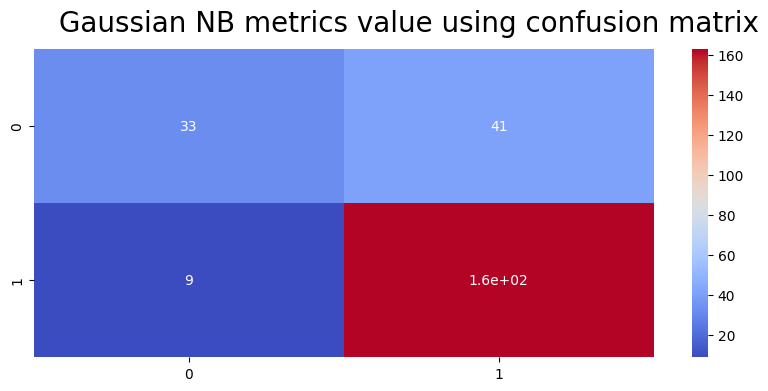

In [73]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_6), annot = True, cmap = 'coolwarm')
plt.suptitle('Gaussian NB metrics value using confusion matrix',fontsize=20)

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
model_7=GradientBoostingClassifier()

In [76]:
model_7.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [77]:
model_7.score(x_train,y_train)

0.9211956521739131

In [78]:
y_pred_7=model_7.predict(x_test)

In [79]:
print('F1 score: ', f1_score(y_test, y_pred_7))
print('Recall_score: ', recall_score(y_test, y_pred_7))
print('Precision score: ', precision_score(y_test, y_pred_7))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_7))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_7))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_7))

F1 score:  0.8383561643835618
Recall_score:  0.8895348837209303
Precision score:  0.7927461139896373
Accuracy Score:  0.7601626016260162
Mean Squared Error:  0.23983739837398374
Mean Absolute Error:  0.23983739837398374


Text(0.5, 0.98, 'Gradient Boost metrics value using confusion matrix')

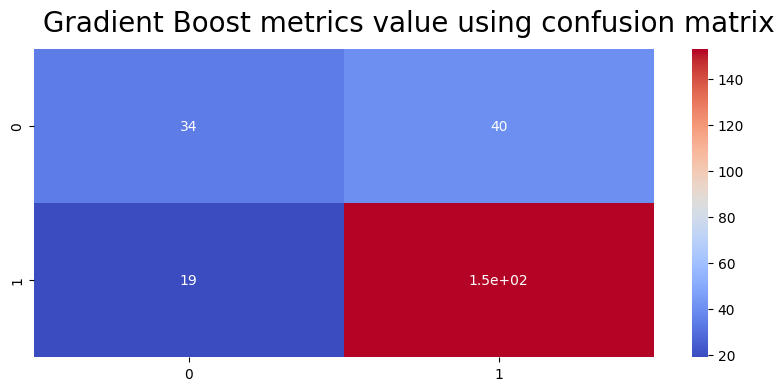

In [80]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_7), annot = True, cmap = 'coolwarm')
plt.suptitle('Gradient Boost metrics value using confusion matrix',fontsize=20)

In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
model_8=MLPClassifier()

In [83]:
model_8.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [84]:
model_8.score(x_train,y_train)

0.7853260869565217

In [85]:
y_pred_8=model_8.predict(x_test)

In [86]:
print('F1 score: ', f1_score(y_test, y_pred_8))
print('Recall_score: ', recall_score(y_test, y_pred_8))
print('Precision score: ', precision_score(y_test, y_pred_8))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_8))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_8))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_8))

F1 score:  0.8658227848101266
Recall_score:  0.9941860465116279
Precision score:  0.7668161434977578
Accuracy Score:  0.7845528455284553
Mean Squared Error:  0.21544715447154472
Mean Absolute Error:  0.21544715447154472


Text(0.5, 0.98, 'MLP metrics value using confusion matrix')

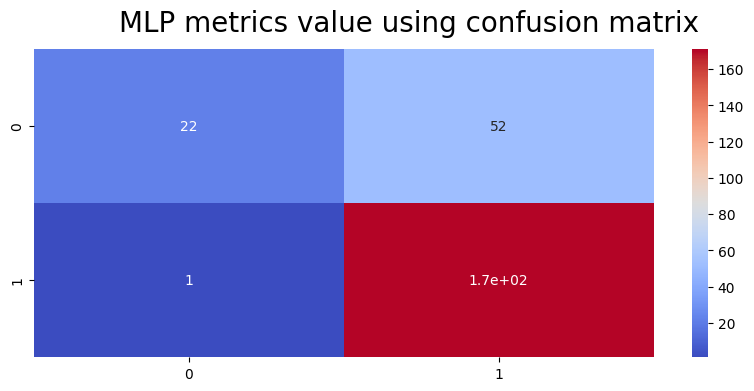

In [87]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_8), annot = True, cmap = 'coolwarm')
plt.suptitle('MLP metrics value using confusion matrix',fontsize=20)

In [88]:
from xgboost import XGBClassifier

In [89]:
model_9 = XGBClassifier()

In [90]:
model_9.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
y_pred_9=model_9.predict(x_test)

In [92]:
print('F1 score: ', f1_score(y_test, y_pred_9))
print('Recall_score: ', recall_score(y_test, y_pred_9))
print('Precision score: ', precision_score(y_test, y_pred_9))
print('Accuracy Score: ', accuracy_score(y_test, y_pred_9))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_9))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_9))

F1 score:  0.8356545961002786
Recall_score:  0.872093023255814
Precision score:  0.8021390374331551
Accuracy Score:  0.7601626016260162
Mean Squared Error:  0.23983739837398374
Mean Absolute Error:  0.23983739837398374


# **Training Performance Of Each Model using Numeric and Visualization**

In [93]:
#Let's enter the model name
model_name=['Logistic_regression','Decision_tree_classifier','Random_forest_classifier','KNN','SVC','Gaussian','Gradient_boost','MLP','XGBoost']
model_train_performance=[model_1.score(x_train,y_train),model_2.score(x_train,y_train),model_3.score(x_train,y_train),model_4.score(x_train,y_train),model_5.score(x_train,y_train),model_6.score(x_train,y_train),model_7.score(x_train,y_train),model_8.score(x_train,y_train),model_9.score(x_train,y_train)]

In [94]:
print('The Training score of Logistic Regression is:',model_1.score(x_train,y_train))
print('The Training score of Decision Tree is:',model_2.score(x_train,y_train))
print('The Training score of Random Forest is:',model_3.score(x_train,y_train))
print('The Training score of KNN is:',model_4.score(x_train,y_train))
print('The Training score of SVM is:',model_5.score(x_train,y_train))
print('The Training score of Gaussian NB is:',model_6.score(x_train,y_train))
print('The Training score of GradientBoost is:',model_7.score(x_train,y_train))
print('The Training score of MLP is:',model_8.score(x_train,y_train))
print('The Training score of XGBoost is:',model_9.score(x_train,y_train))

The Training score of Logistic Regression is: 0.8097826086956522
The Training score of Decision Tree is: 1.0
The Training score of Random Forest is: 1.0
The Training score of KNN is: 0.7282608695652174
The Training score of SVM is: 0.6793478260869565
The Training score of Gaussian NB is: 0.8016304347826086
The Training score of GradientBoost is: 0.9211956521739131
The Training score of MLP is: 0.7853260869565217
The Training score of XGBoost is: 1.0


Text(0.5, 0.98, 'Training Score Of Each Model')

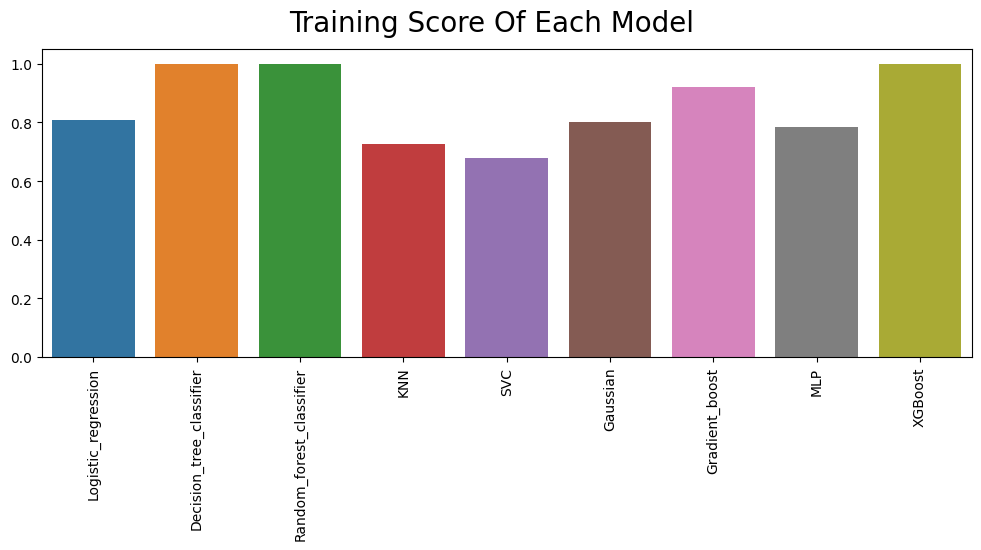

In [95]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_train_performance)
plt.xticks(rotation=90)
plt.suptitle('Training Score Of Each Model',fontsize=20)

# **Testing performance of Each Model**

In the testing performance evaluation, we will utilize the accuracy_score metric for each model to determine the best-performing classifier.

In [96]:
#Let us create a table for the testing data
model_test_performance=[accuracy_score(y_test, y_pred_1),accuracy_score(y_test, y_pred_2),accuracy_score(y_test, y_pred_3),accuracy_score(y_test, y_pred_4),accuracy_score(y_test, y_pred_5),accuracy_score(y_test, y_pred_6),accuracy_score(y_test, y_pred_7),accuracy_score(y_test, y_pred_8),accuracy_score(y_test,y_pred_9)]

In [97]:
print('The Testing score of Logistic Regression is:',accuracy_score(y_test,y_pred_1))
print('The Testing score of Decision Tree is:',accuracy_score(y_test,y_pred_2))
print('The Testing score of Random Forest is:',accuracy_score(y_test,y_pred_3))
print('The Testing score of KNN is:',accuracy_score(y_test,y_pred_4))
print('The Testing score of SVM is:',accuracy_score(y_test,y_pred_5))
print('The Testing score of Gaussian NB is:',accuracy_score(y_test,y_pred_6))
print('The Testing score of GradientBoost is:',accuracy_score(y_test,y_pred_7))
print('The Testing score of MLP is:',accuracy_score(y_test,y_pred_8))
print('The Testing score of XGBoost is:',accuracy_score(y_test,y_pred_9))

The Testing score of Logistic Regression is: 0.8130081300813008
The Testing score of Decision Tree is: 0.6829268292682927
The Testing score of Random Forest is: 0.7886178861788617
The Testing score of KNN is: 0.6219512195121951
The Testing score of SVM is: 0.6991869918699187
The Testing score of Gaussian NB is: 0.7967479674796748
The Testing score of GradientBoost is: 0.7601626016260162
The Testing score of MLP is: 0.7845528455284553
The Testing score of XGBoost is: 0.7601626016260162


Text(0.5, 0.98, 'Testing Score Of Each Model')

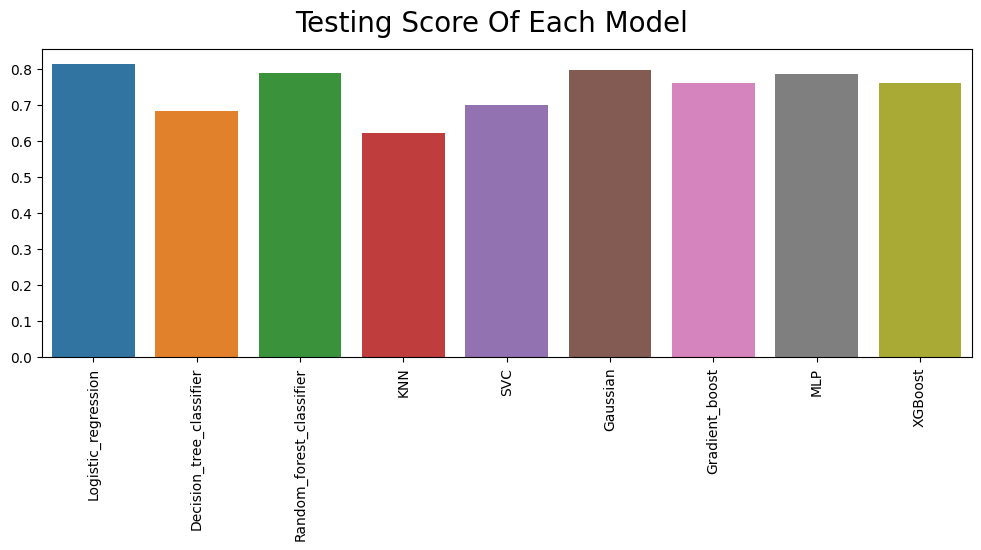

In [98]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_test_performance)
plt.xticks(rotation=90)
plt.suptitle('Testing Score Of Each Model',fontsize=20)